In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

import wrangle
import explore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
df = pd.read_csv('san_antonio_2018_tract.csv')
train_exp.head(1)

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,f_age65_comp,f_age17_comp,f_disabl_comp,f_sngpnt_comp,f_comp_total,f_minrty_status,f_limeng_status,f_status_total,f_munit_trans,f_mobile_trans,f_crowd_trans,f_noveh_trans,f_groupq_trans,f_trans_total,all_flags_total,zip,tract_cases_per_100k,bin_svi,rank_svi,rising,falling,delta,mean,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
289,48029181821,328,8.8,1.348,0.4879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78249,2627.300031,Low Moderate,3,1,0,0.2056,0.507933,1,1,0,0,0,0,0,0


In [3]:
pd.set_option('display.max_columns', None)
df.head(1)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,48,TEXAS,TX,48029,Bexar,48029110100,"Census Tract 1101, Bexar County, Texas",1.364296,3102,365,2447,76,1655,198,513,178,64,57,38914,6410,569,202,499,128,153,117,453,131,55,35,2103,409,305,160,2028,201,0,13,64,60,370,119,744,158,20.8,7.4,4.1,3.7,38914,6410,20.4,6.8,16.1,4.1,4.9,3.7,18.8,5.6,3.3,2.1,67.8,10.5,10.0,5.1,82.9,7.8,0.0,1.6,3.9,3.7,22.4,7.0,24.0,4.2,0.6942,0.3715,0.1945,0.6358,1.896,0.4675,0.7179,0.0132,0.8648,0.1056,1.7015,0.3001,0.6044,0.7318,1.3362,0.6804,0.9914,0.0,0.5134,0.977,0.9744,3.4562,0.9242,8.3899,0.6503,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,3,3,272,130,11.3,5.0,38328


## Clustering In San Antonio

Takeaway: Features that demonstrate potential for Clustering

1. SPL_THEME1 (Sum of series for Socioeconomic theme)


Very few features are affective in classifying SVI groups. Suggests COVID affects all groups equally in Dallas


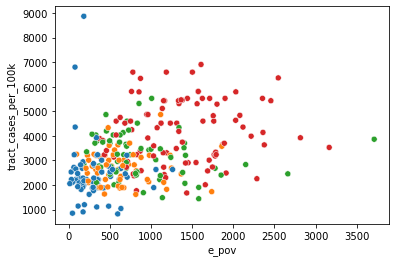

In [32]:
sns.scatterplot(x='e_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

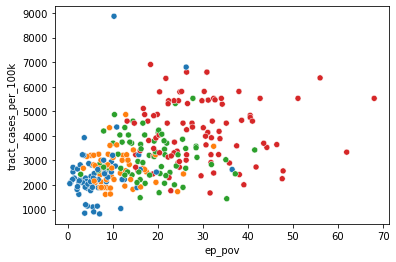

In [33]:
sns.scatterplot(x='ep_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

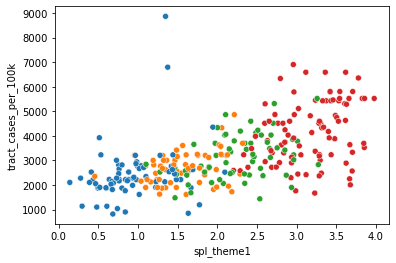

In [31]:
sns.scatterplot(x='spl_theme1', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()